In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [57]:
data = pd.read_csv("/content/Banking Customer Complaints.csv")
data

,Customer ID,Complaint Type,Description
0,1001,Transaction Issue,Unauthorized debit from the account
1,1002,Account Access,Unable to reset internet banking password
2,1003,Payment Processing,Delayed processing of credit card payment
3,1004,Customer Service,Rude behavior of a customer representative
4,1005,Account Access,Forgotten account number and unable to retriev...
5,1006,Transaction Issue,Incorrect transaction amount debited
6,1007,Payment Processing,Payment not reflected in the account statement
7,1008,Transaction Issue,ATM withdrawal amount not dispensed
8,1009,Account Access,Error while linking a new account to internet ...
9,1010,Customer Service,Long waiting time on the customer service help...


In [58]:
data['Complaint Type'].value_counts()

Transaction Issue      3
Customer Service       2
Account Access         2
Account Access         1
Payment Processing     1
 Payment Processing    1
Name: Complaint Type, dtype: int64

In [59]:
data.shape

(10, 3)

In [60]:
data.columns

Index(['Customer ID', 'Complaint Type', 'Description'], dtype='object')

In [61]:
data['Customer ID'] = data['Customer ID'].astype('int')

In [62]:
data.dtypes

Customer ID        int64
Complaint Type    object
Description       object
dtype: object

In [63]:
data['Transaction Issue'] = data['Complaint Type'].apply(lambda x : 1 if 'Transaction Issue' in x else 0)

In [64]:
data['Account Access'] = data['Complaint Type'].apply(lambda x : 2 if 'Account Access' in x else 0)

In [65]:
data['Payment Processing'] = data['Complaint Type'].apply(lambda x : 3 if 'Payment Processing' in x else 0)

In [66]:
data['Customer Service'] = data['Complaint Type'].apply(lambda x : 4 if 'Customer Service' in x else 0)

In [67]:
#data = data.drop(['Payment Processing\t'], axis = 1)

In [68]:
data.dtypes

Customer ID            int64
Complaint Type        object
Description           object
Transaction Issue      int64
Account Access         int64
Payment Processing     int64
Customer Service       int64
dtype: object

In [69]:
data

,Customer ID,Complaint Type,Description,Transaction Issue,Account Access,Payment Processing,Customer Service
0,1001,Transaction Issue,Unauthorized debit from the account,1,0,0,0
1,1002,Account Access,Unable to reset internet banking password,0,2,0,0
2,1003,Payment Processing,Delayed processing of credit card payment,0,0,3,0
3,1004,Customer Service,Rude behavior of a customer representative,0,0,0,4
4,1005,Account Access,Forgotten account number and unable to retriev...,0,2,0,0
5,1006,Transaction Issue,Incorrect transaction amount debited,1,0,0,0
6,1007,Payment Processing,Payment not reflected in the account statement,0,0,3,0
7,1008,Transaction Issue,ATM withdrawal amount not dispensed,1,0,0,0
8,1009,Account Access,Error while linking a new account to internet ...,0,2,0,0
9,1010,Customer Service,Long waiting time on the customer service help...,0,0,0,4


In [70]:
data['Complaint Type'] = data['Complaint Type'].apply(lambda x: x.strip() if isinstance(x, str) else x)

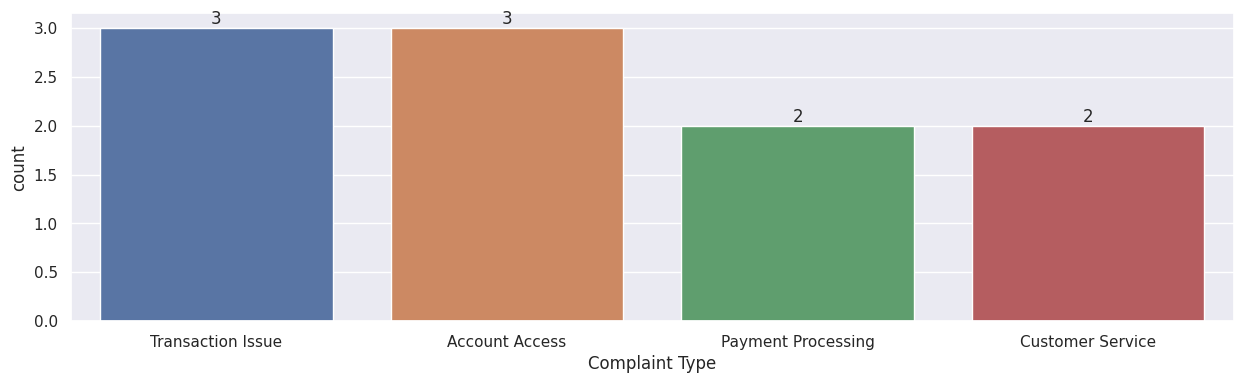

In [82]:
ax = sns.countplot(x = 'Complaint Type', data = data)
sns.set(rc={'figure.figsize':(15,10)})

for bars in ax.containers:
    ax.bar_label(bars)

In [72]:
data['Count'] = data[['Transaction Issue', 'Account Access', 'Payment Processing', 'Customer Service']].max(1)
data

,Customer ID,Complaint Type,Description,Transaction Issue,Account Access,Payment Processing,Customer Service,Count
0,1001,Transaction Issue,Unauthorized debit from the account,1,0,0,0,1
1,1002,Account Access,Unable to reset internet banking password,0,2,0,0,2
2,1003,Payment Processing,Delayed processing of credit card payment,0,0,3,0,3
3,1004,Customer Service,Rude behavior of a customer representative,0,0,0,4,4
4,1005,Account Access,Forgotten account number and unable to retriev...,0,2,0,0,2
5,1006,Transaction Issue,Incorrect transaction amount debited,1,0,0,0,1
6,1007,Payment Processing,Payment not reflected in the account statement,0,0,3,0,3
7,1008,Transaction Issue,ATM withdrawal amount not dispensed,1,0,0,0,1
8,1009,Account Access,Error while linking a new account to internet ...,0,2,0,0,2
9,1010,Customer Service,Long waiting time on the customer service help...,0,0,0,4,4


In [73]:
data = data.reindex(columns=['Customer ID', 'Complaint Type', 'Description', 'Count','Transaction Issue','Account Access','Payment Processing','Customer Service'])
data

,Customer ID,Complaint Type,Description,Count,Transaction Issue,Account Access,Payment Processing,Customer Service
0,1001,Transaction Issue,Unauthorized debit from the account,1,1,0,0,0
1,1002,Account Access,Unable to reset internet banking password,2,0,2,0,0
2,1003,Payment Processing,Delayed processing of credit card payment,3,0,0,3,0
3,1004,Customer Service,Rude behavior of a customer representative,4,0,0,0,4
4,1005,Account Access,Forgotten account number and unable to retriev...,2,0,2,0,0
5,1006,Transaction Issue,Incorrect transaction amount debited,1,1,0,0,0
6,1007,Payment Processing,Payment not reflected in the account statement,3,0,0,3,0
7,1008,Transaction Issue,ATM withdrawal amount not dispensed,1,1,0,0,0
8,1009,Account Access,Error while linking a new account to internet ...,2,0,2,0,0
9,1010,Customer Service,Long waiting time on the customer service help...,4,0,0,0,4


([<matplotlib.patches.Wedge at 0x7f9e4d5493c0>,
 [Text(1.0897545402588844, 0.14978331677843057, 'Unauthorized debit from the account'),
  Text(0.9398613391846532, 0.5715423546037779, 'Unable to reset internet banking password'),
  Text(0.36836756178512736, 1.0364870184543946, 'Delayed processing of credit card payment'),
  Text(-0.6343483698738268, 0.8986668713368813, 'Rude behavior of a customer representative'),
  Text(-1.089754545517781, 0.14978327851711154, 'Forgotten account number and unable to retrieve it'),
  Text(-1.059209004152627, -0.29677649085128116, 'Incorrect transaction amount debited'),
  Text(-0.7508084264514052, -0.8039195897411415, 'Payment not reflected in the account statement'),
  Text(-0.2238015743525821, -1.0769925047637545, 'ATM withdrawal amount not dispensed'),
  Text(0.2238016625834817, -1.0769924864291625, 'Error while linking a new account to internet banking'),
  Text(0.9398613793183934, -0.5715422886066501, 'Long waiting time on the customer service hel

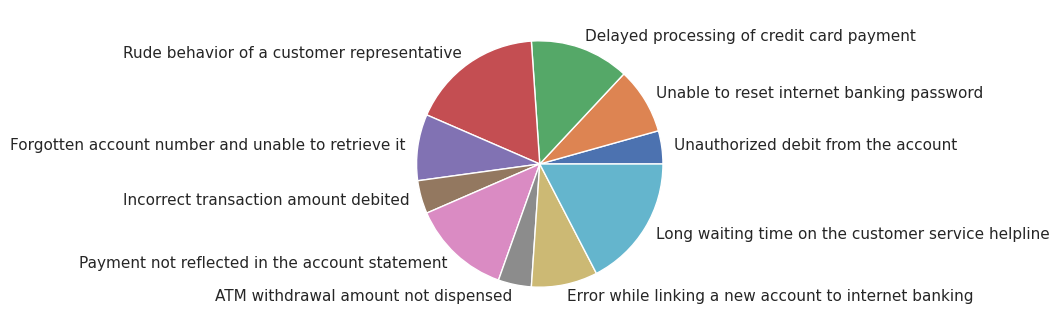

In [80]:
plt.pie(data['Count'], labels=data['Description'])